# MSA 2025 Phase 2 - Part 2: Minimum Temperature Prediction from Weather Data

## 1. Load and check the dataset

In [68]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [69]:
df = pd.read_csv('../2. Machine Learning Project/Summary of Weather.csv')
# Display the first 10 instances in the dataset
print(f"The first 10 instances in the datasets are:\n{df.head(10)}")

The first 10 instances in the datasets are:
     STA       Date Precip  WindGustSpd    MaxTemp    MinTemp   MeanTemp  \
0  10001   1942-7-1  1.016          NaN  25.555556  22.222222  23.888889   
1  10001   1942-7-2      0          NaN  28.888889  21.666667  25.555556   
2  10001   1942-7-3   2.54          NaN  26.111111  22.222222  24.444444   
3  10001   1942-7-4   2.54          NaN  26.666667  22.222222  24.444444   
4  10001   1942-7-5      0          NaN  26.666667  21.666667  24.444444   
5  10001   1942-7-6      0          NaN  26.666667  21.666667  24.444444   
6  10001   1942-7-7      T          NaN  28.333333  22.777778  25.555556   
7  10001   1942-7-8  3.556          NaN  26.666667  22.222222  24.444444   
8  10001   1942-7-9      T          NaN  27.222222  22.777778  25.000000   
9  10001  1942-7-10  3.556          NaN  25.555556  21.666667  23.333333   

  Snowfall PoorWeather  YR  ...  FB  FTI ITH  PGT  TSHDSBRSGF  SD3  RHX  RHN  \
0      0.0         NaN  42  ... NaN  Na

/var/folders/5x/mssgk83922xd5hkymkggmnn80000gn/T/ipykernel_27532/1623879813.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../2. Machine Learning Project/Summary of Weather.csv')


## 2. Clean the dataset, drop variables

In [70]:
df.nunique()

STA             159
Date           2192
Precip          540
WindGustSpd      30
MaxTemp         149
MinTemp         132
MeanTemp        136
Snowfall         42
PoorWeather      39
YR                6
MO               12
DA               31
PRCP            540
DR               26
SPD              30
MAX             149
MIN             132
MEA             136
SNF              42
SND               1
FT                0
FB                0
FTI               0
ITH               0
PGT             179
TSHDSBRSGF       39
SD3               0
RHX               0
RHN               0
RVG               0
WTE               0
dtype: int64

In [71]:
print(df.isnull().mean().sort_values(ascending=False))

WTE            1.000000
FT             1.000000
RVG            1.000000
FB             1.000000
RHN            1.000000
RHX            1.000000
SD3            1.000000
FTI            1.000000
ITH            1.000000
PGT            0.995590
SPD            0.995531
WindGustSpd    0.995531
DR             0.995523
SND            0.953268
TSHDSBRSGF     0.712391
PoorWeather    0.712391
PRCP           0.016230
Snowfall       0.009770
SNF            0.009770
MEA            0.004183
MAX            0.003982
MIN            0.003931
Date           0.000000
DA             0.000000
MO             0.000000
YR             0.000000
MeanTemp       0.000000
MinTemp        0.000000
MaxTemp        0.000000
Precip         0.000000
STA            0.000000
dtype: float64


In [72]:
# clean the data


drop_columns =[
    'WTE', 'FT', 'RVG', 'FB', 'RHN', 'RHX', "SD3", 'FTI', 'ITH', # columns with all missing values
    'SND', # cloumn with only 1 unique value
    'PGT', 'SPD', 'WindGustSpd', 'DR', # cloumns with more than 99% missing values
    'PRCP', 'MAX', 'MIN', 'MEA', 'SNF', 'Date', # duplicate columns
    'STA', # Identifier column
    'TSHDSBRSGF', 'PoorWeather' # columns with no useful information
]
df_clean1 = df.drop(columns=drop_columns, errors='ignore')
df_clean = df_clean1.dropna()  # drop rows with any missing values
# check the cleaned data
print(f"The cleaned dataset has {df_clean.shape[0]} rows and {df_clean.shape[1]} columns.")
print(f"The first 10 instances in the cleaned dataset are:\n{df_clean.head(10)}")


The cleaned dataset has 117877 rows and 8 columns.
The first 10 instances in the cleaned dataset are:
  Precip    MaxTemp    MinTemp   MeanTemp Snowfall  YR  MO  DA
0  1.016  25.555556  22.222222  23.888889      0.0  42   7   1
1      0  28.888889  21.666667  25.555556      0.0  42   7   2
2   2.54  26.111111  22.222222  24.444444      0.0  42   7   3
3   2.54  26.666667  22.222222  24.444444      0.0  42   7   4
4      0  26.666667  21.666667  24.444444      0.0  42   7   5
5      0  26.666667  21.666667  24.444444      0.0  42   7   6
6      T  28.333333  22.777778  25.555556      0.0  42   7   7
7  3.556  26.666667  22.222222  24.444444      0.0  42   7   8
8      T  27.222222  22.777778  25.000000      0.0  42   7   9
9  3.556  25.555556  21.666667  23.333333      0.0  42   7  10


/var/folders/5x/mssgk83922xd5hkymkggmnn80000gn/T/ipykernel_27532/3545668000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Precip'] = df_clean['Precip'].replace('T', 0).astype(float)
/var/folders/5x/mssgk83922xd5hkymkggmnn80000gn/T/ipykernel_27532/3545668000.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Snowfall'] = pd.to_numeric(df_clean['Snowfall'], errors='coerce')


Correlation with MinTemp:
 MinTemp     1.000000
MeanTemp    0.963516
MaxTemp     0.871197
Precip      0.087544
MO          0.069219
DA         -0.003341
YR         -0.021645
Snowfall   -0.320022
Name: MinTemp, dtype: float64


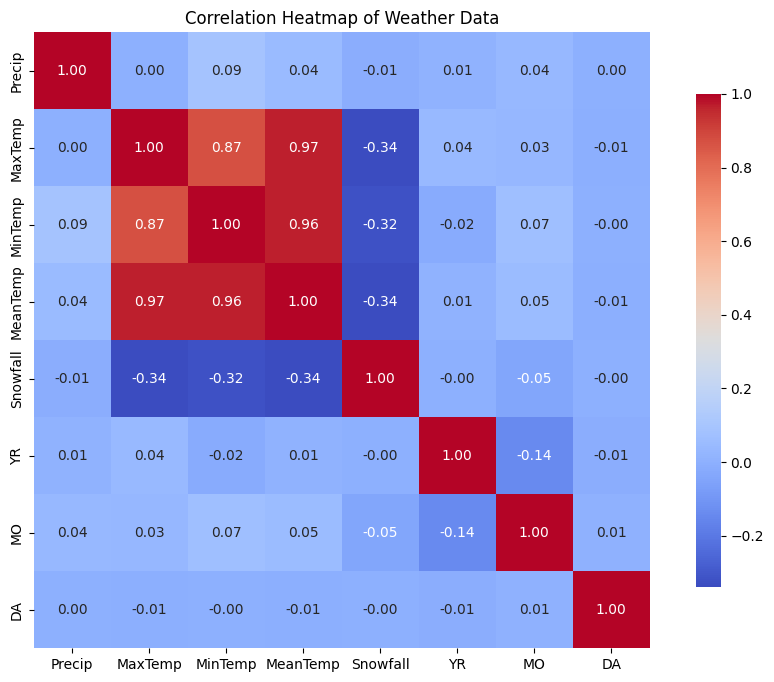

In [73]:
# convert the 'T' in 'Precip' to 0
df_clean['Precip'] = df_clean['Precip'].replace('T', 0).astype(float)

df_clean['Snowfall'] = pd.to_numeric(df_clean['Snowfall'], errors='coerce')

# Compute correlation matrix
corr = df_clean.corr(numeric_only=True)

print("Correlation with MinTemp:\n", corr['MinTemp'].sort_values(ascending=False))

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Weather Data')
plt.show()

## 3. Select the feature(s) for the model, and explain the reason

In [74]:
features = ['MeanTemp', 'MaxTemp', 'Precip', 'Snowfall', 'MO']
target = 'MinTemp'


'MeanTemp' is highly positive correlated with 'MinTemp' (corr = 0.964), which is make sence because the mean temperature is partly based on the min temperature.  

'MaxTemp'are also highly correlated (corr = 0.871), so it is still important. 

'Snowfall' is negatively correlated with 'MinTemp' (corr = -0.32), indicating that more snowfall are associated with colder temperature.

'Precip' and 'MO' are weak correlation with 'MinTemp' (corr = 0.087 and 0.069), but 'Precip' may be can provide some weather information and 'MO'(month) may help to get seasonal cycles.

'YR'(year) and 'DA'(day) are very weak correlation (corr = -0.021 and -0.003), so they are not useful for the model and add noise, just dropped them.

## 4. Split the dataset (80% for training, 20% for testing)

In [75]:
X = df_clean[features]
y = df_clean[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Choose the algorithm, train and test the model

In [76]:
# Initialize and train the model use Linear Regression
model = LinearRegression()
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


## 6. Evaluate and Visualize model Performance

RMSE: 0.8075521690800813
MAE: 0.38950756816311644
R^2: 0.9900106707065986


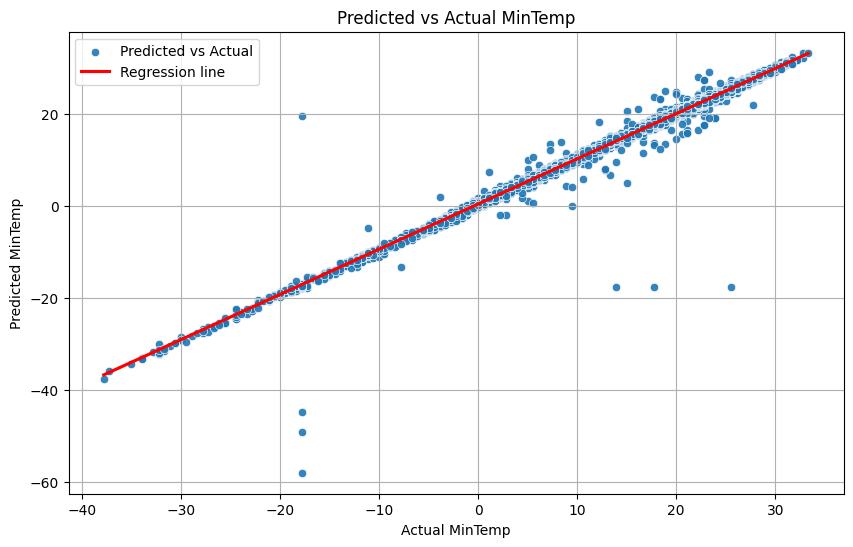

In [77]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:}")
print(f"MAE: {mae:}")
print(f"R^2: {r2:}")

# Plot the predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.9, label='Predicted vs Actual')
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red', label='Regression line')
plt.xlabel('Actual MinTemp')
plt.ylabel('Predicted MinTemp')
plt.title('Predicted vs Actual MinTemp')
plt.legend()
plt.grid()
plt.show()


## 7. What is the R² value and RMSE of the model? How these values indicate the model performance?

In this model, the R^2 value is 0.990 and the RMSE is 0.808, which indicate the  excellent performance. The R^2 score is 0.990 means that this model can explain 99% of the changes in minimum temperature, which shows a very high match. The RMSE is 0.808 shows the average of model's prediction error is less than 1 degree, which also means this model is making very accurate predictions. Overall, this model performs very well at predicting minimum temperature.

## 8. Discuss the model performance based on the plot

Based on predicted vs actual scatter plot, the model shows excellent performance in predicting minimum temperature. Most of blue dots are tightly clustered around the red regression line, which means the predicted values are very close to the actual values. This highly accuracy is also supported by the R^2 score of 0.990. However, there are some outliers, especially when the actual values are very high or low, where the predicted values deviate. This may be due to the limited data, noise in the data or unmodeled compleity. Overall, the plot confirms that the model can make consistent and accurate predictions in most situations.